In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# 1️⃣ Load dataset
df_train = pd.read_csv("data/features/session_based_trainset.csv")
print("Training dataset shape:", df_train.shape)
df_test = pd.read_csv("data/features/session_based_testset.csv")
print("Testing dataset shape:", df_test.shape)

Training dataset shape: (488524, 280)
Testing dataset shape: (122132, 280)


In [8]:
# 2️⃣ Use the correct label column
label_col = "label"
print("Unique values in label:", df_train[label_col].unique())
print("Unique values in label:", df_test[label_col].unique())

Unique values in label: [0 1]
Unique values in label: [1 0]


In [9]:
# 3️⃣ Prepare features and target
y_raw = df_train[label_col]
X = df_train.drop(columns=[label_col]).fillna(0)

ytest_raw = df_test[label_col]
X_test = df_test.drop(columns=[label_col]).fillna(0) #new x test

In [10]:
# 4️⃣ Convert label text/numbers → binary
def map_label(val):
    val_str = str(val).lower()
    if "benign" in val_str or val == 0 or val == "0":
        return 0
    else:
        return 1

y = y_raw.apply(map_label)
y_test = ytest_raw.apply(map_label) #new y test
print("\nBinary label distribution in train set (0=Benign, 1=Malicious):\n", y.value_counts())
print("\nBinary label distribution in test set (0=Benign, 1=Malicious):\n", y_test.value_counts())


Binary label distribution in train set (0=Benign, 1=Malicious):
 label
1    245470
0    243054
Name: count, dtype: int64

Binary label distribution in test set (0=Benign, 1=Malicious):
 label
0    61273
1    60859
Name: count, dtype: int64


In [11]:
# 5️⃣ Train/test split

#no need to perform splits since there is an entire separate testing data set
X_train = X
y_train = y

#scaler important for distance based models like KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 6️⃣ Train Random Forest
lin_regression = LinearRegression() 
lin_regression.fit(X_train_scaled, y_train)
#cell executed in 10.2 seconds

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
# 7️⃣ Evaluate model
y_proba = lin_regression.predict(X_test_scaled)
y_pred = (y_proba > 0.5).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 4))
#the confusion matrix just below is showing correctly, but in the visualization it isn't showing bottom row correctly


Confusion Matrix:
[[57822  3451]
 [ 3495 57364]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9430    0.9437    0.9433     61273
           1     0.9433    0.9426    0.9429     60859

    accuracy                         0.9431    122132
   macro avg     0.9431    0.9431    0.9431    122132
weighted avg     0.9431    0.9431    0.9431    122132

ROC AUC: 0.9827


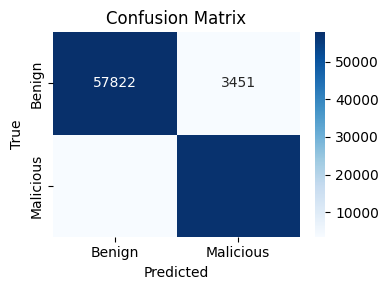

In [14]:
# 8️⃣ Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Malicious"],
            yticklabels=["Benign", "Malicious"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


In [ ]:
# 9️⃣ Feature Importance

#Features are not weighted or stored in the model for logistic regression, 
#as logistic regression does not construct a complex model during training,
#rather it creates a well tuned dividing line for binary classification purposes

In [15]:
# 🔟 Save 
import joblib
#similarly there is no model to save, simply the dataset stored within the model itself
joblib.dump(lin_regression, "report/linr_session_model.joblib")
print("\nModel saved in report/")


Model saved in report/


In [16]:
# 11 CICIDS2017 data set testing setup
df2 = pd.read_csv("data/CICIDS2017/cicids2017_combined.csv")
label_col = " Label"
print("Unique values in label:", df2[label_col].unique())
y_raw2 = df2[label_col]
X2 = df2.drop(columns=[label_col]).fillna(0)
def map_label(val):
    val_str = str(val).lower()
    if "benign" in val_str or val == 0 or val == "0":
        return 0
    else:
        return 1
y2 = y_raw2.apply(map_label)
print("\nBinary label distribution (0=Benign, 1=Malicious):\n", y2.value_counts())

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.3, stratify=y2, random_state=42
)
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)
print("\nTrain:", X_train_scaled2.shape, "Test:", X_test_scaled2.shape)

Unique values in label: ['BENIGN' 'DDoS' 'PortScan' 'Bot' '-1iltration' 'Web Attack � Brute Force'
 'Web Attack � XSS' 'Web Attack � Sql Injection' 'FTP-Patator'
 'SSH-Patator' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk'
 'DoS GoldenEye' 'Heartbleed']

Binary label distribution (0=Benign, 1=Malicious):
  Label
0    2273097
1     557646
Name: count, dtype: int64

Train: (1981520, 78) Test: (849223, 78)


In [ ]:
# 12 CICIDS set testing training
lin_regression2 = LinearRegression() 
lin_regression2.fit(X_train_scaled2, y_train2)
#cell executed in 11.5 seconds

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False



Confusion Matrix:
[[675164   6765]
 [ 87990  79304]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8847    0.9901    0.9344    681929
           1     0.9214    0.4740    0.6260    167294

    accuracy                         0.8884    849223
   macro avg     0.9031    0.7321    0.7802    849223
weighted avg     0.8919    0.8884    0.8737    849223

ROC AUC: 0.9644


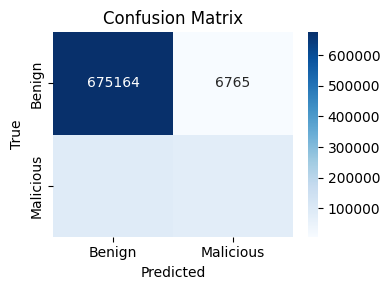

In [18]:
# 13 CICIDS2017 set testing evaluation
y_proba2 = lin_regression2.predict(X_test_scaled2)
y_pred2 = (y_proba2 > 0.5).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test2, y_pred2))
print("\nClassification Report:")
print(classification_report(y_test2, y_pred2, digits=4))
print("ROC AUC:", round(roc_auc_score(y_test2, y_proba2), 4))

cm = confusion_matrix(y_test2, y_pred2)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Malicious"],
            yticklabels=["Benign", "Malicious"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

In [2]:
# 14 CTU13 data set testing setup
df3 = pd.read_csv("data/ctu13/CTU13_Combined_Traffic.csv")
label_col = "Label"
print("Unique values in label:", df3[label_col].unique())
y_raw3 = df3[label_col]
X3 = df3.drop(columns=[label_col]).fillna(0)
def map_label(val):
    val_str = str(val).lower()
    if "benign" in val_str or val == 0 or val == "0":
        return 0
    else:
        return 1
y3 = y_raw3.apply(map_label)
print("\nBinary label distribution (0=Benign, 1=Malicious):\n", y3.value_counts())

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3, y3, test_size=0.3, stratify=y3, random_state=42
)
scaler = StandardScaler()
X_train_scaled3 = scaler.fit_transform(X_train3)
X_test_scaled3 = scaler.transform(X_test3)
print("\nTrain:", X_train_scaled3.shape, "Test:", X_test_scaled3.shape)

Unique values in label: [1 0]

Binary label distribution (0=Benign, 1=Malicious):
 Label
0    53314
1    38898
Name: count, dtype: int64

Train: (64548, 57) Test: (27664, 57)


In [ ]:
# 15 CTU13 set testing training
lin_regression3 = LinearRegression() 
lin_regression3.fit(X_train_scaled3, y_train3)
#cell executed in 0.2 seconds

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False



Confusion Matrix:
[[14929  1065]
 [ 2861  8809]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8392    0.9334    0.8838     15994
           1     0.8921    0.7548    0.8178     11670

    accuracy                         0.8581     27664
   macro avg     0.8657    0.8441    0.8508     27664
weighted avg     0.8615    0.8581    0.8559     27664

ROC AUC: 0.943


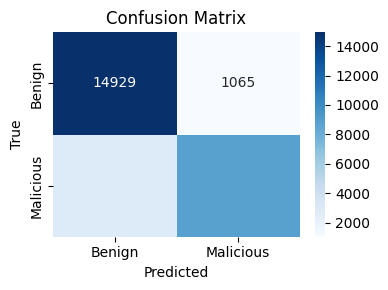

In [ ]:
# 16 CTU13 set testing evaluation
y_proba3 = lin_regression3.predict(X_test_scaled3)
y_pred3 = (y_proba3 > 0.5).astype(int)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test3, y_pred3))
print("\nClassification Report:")
print(classification_report(y_test3, y_pred3, digits=4))
print("ROC AUC:", round(roc_auc_score(y_test3, y_proba3), 4))

cm = confusion_matrix(y_test3, y_pred3)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Malicious"],
            yticklabels=["Benign", "Malicious"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()